# SARMA 모델 적용 및 결과 도출

In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#subway passenger data
data_list = []
df_date = []
df_list = []
for i in range(2015, 2020 + 1):
  if i < 2020:
    for j in range(1, 12 + 1):
      if j < 10:
        data_list.append("/content/drive/My Drive/Colab/COVID19/subway_passenger_count/CARD_SUBWAY_MONTH_" + str(i) + '0' + str(j) + ".csv")
        df_date.append(str(i) + '0' + str(j))
        df_list.append("df_" + str(i) + '0' + str(j))
      else:
        data_list.append("/content/drive/My Drive/Colab/COVID19/subway_passenger_count/CARD_SUBWAY_MONTH_" + str(i) + str(j) + ".csv")
        df_date.append(str(i) + str(j))
        df_list.append("df_" + str(i) + str(j))
  else:
    for j in range(1, 3 + 1):
      if j < 10:
        data_list.append("/content/drive/My Drive/Colab/COVID19/subway_passenger_count/CARD_SUBWAY_MONTH_" + str(i) + '0' + str(j) + ".csv")
        df_date.append(str(i) + '0' + str(j))
        df_list.append("df_" + str(i) + '0' + str(j))
      else:
        data_list.append("/content/drive/My Drive/Colab/COVID19/subway_passenger_count/CARD_SUBWAY_MONTH_" + str(i) + str(j) + ".csv")
        df_date.append(str(i) + str(j))
        df_list.append("df_" + str(i) + str(j))

In [ ]:
for i in range(len(data_list)):
  df_list[i] = pd.read_csv(data_list[i], engine='python', encoding='euc_kr')

In [ ]:
passengers_list = []
target_list = []
dates_list = []
month_dates_list = []
month_passengers_list = []
for i in range(len(df_list)):
  year = int(df_date[i][0]) * 1000 + int(df_date[i][1]) * 100 + int(df_date[i][2]) * 10 + int(df_date[i][3])
  month = int(df_date[i][4]) * 10 + int(df_date[i][5])
  if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
    days = 31
  elif month == 2:
    if (year % 4 == 0) and (year % 100 !=0) or (year % 400 == 0):
      days = 29
    else:
      days = 28
  else:
    days = 30  
  
  if month == 10 or month == 11 or month == 12:
    month_dates_list.append(str(year) + '-' + str(month))
  else:
    month_dates_list.append(str(year) + '-0' + str(month))
  month_passengers_list.append(0)
  for j in range(days):
    target = year*10000 + month*100 + j+1
    dates = str(year) + '-' + str(month) + '-' + str(j+1)
    dates_list.append(dates)
    passengers_list.append(sum(df_list[i]['승차총승객수'][df_list[i]['사용일자']==target]))
    month_passengers_list[i] += sum(df_list[i]['승차총승객수'][df_list[i]['사용일자']==target])

In [ ]:
month_df = pd.DataFrame(dict(time = month_dates_list,
                             value = month_passengers_list))

In [ ]:
df = pd.DataFrame(dict(time = dates_list,
                             value = passengers_list))

In [ ]:
df[df['time']=='2020-1-29']

,time,value
1854,2020-1-29,7515756


In [ ]:
df[df['time']=='2015-1-29']

,time,value
28,2015-1-29,7822453


In [ ]:
df[df['time']=='2016-1-29']

,time,value
393,2016-1-29,8110230


In [ ]:
df[df['time']=='2017-1-29']

,time,value
759,2017-1-29,3571189


In [ ]:
df[df['time']=='2018-1-29']

,time,value
1124,2018-1-29,7364766


In [ ]:
df[df['time']=='2019-1-29']

,time,value
1489,2019-1-29,7948890


In [ ]:
(sum(sum(month_df[month_df['time']=='2019-06']['value'], month_df[month_df['time']=='2018-06']['value']),sum(month_df[month_df['time']=='2017-06']['value'], month_df[month_df['time']=='2016-06']['value']))/4)

17    2.212235e+08
Name: value, dtype: float64

In [ ]:
month_df[month_df['time']=='2015-06']['value']

5    203119706
Name: value, dtype: int64

In [ ]:
203119706/ 2.212235e+08

0.9181651406835168

In [ ]:
sum(sum(sum(month_df[month_df['time']=='2019-02']['value'], month_df[month_df['time']=='2018-02']['value']),sum(month_df[month_df['time']=='2015-02']['value'], month_df[month_df['time']=='2016-02']['value'])),month_df[month_df['time']=='2017-02']['value'])/5

25    193284361.6
Name: value, dtype: float64

In [ ]:
month_df[month_df['time']=='2020-02']['value']

61    169582542
Name: value, dtype: int64

In [ ]:
169582542/193284361.6

0.8773733197875022

In [ ]:
sum(sum(sum(month_df[month_df['time']=='2019-03']['value'], month_df[month_df['time']=='2018-03']['value']),sum(month_df[month_df['time']=='2015-03']['value'], month_df[month_df['time']=='2016-03']['value'])),month_df[month_df['time']=='2017-03']['value'])/5

26    236387460.2
Name: value, dtype: float64

In [ ]:
month_df[month_df['time']=='2020-03']['value']

62    139686779
Name: value, dtype: int64

In [ ]:
139686779/236387460.2

0.5909229655490837

In [ ]:
month_dates_list

['2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03']

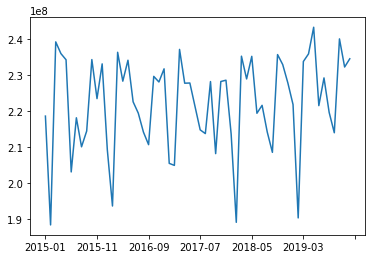

In [ ]:
data = pd.Series(month_passengers_list, index = month_dates_list)
data_ARIMA_cut = data.loc[:'2019-12']
data_ARIMA_cut_float = data_ARIMA_cut[:].astype(np.float)
data_ARIMA_cut_float.plot()

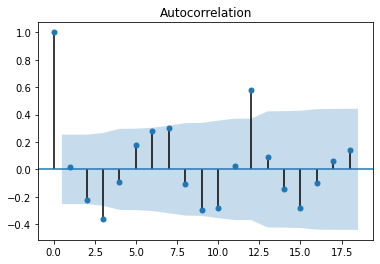

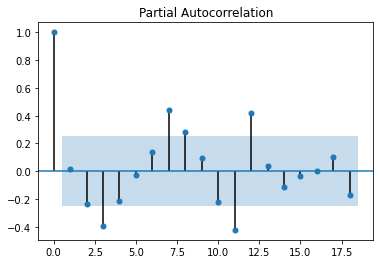

<Figure size 1440x288 with 0 Axes>

In [ ]:
plot_acf(data_ARIMA_cut_float)
plot_pacf(data_ARIMA_cut_float)
plt.figure(figsize=(20,4))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


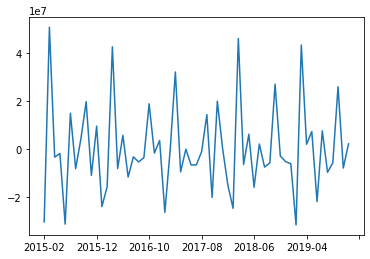

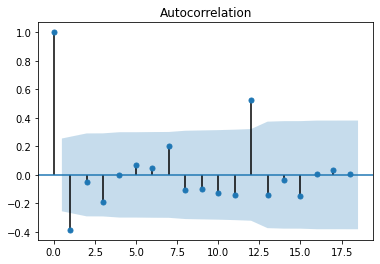

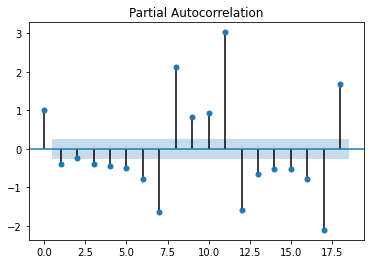

In [ ]:
diff_1 = data_ARIMA_cut_float.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
model = SARIMAX(data_ARIMA_cut_float, order=(1,1,0), seasonal_order = (1,1,1,12))
model_fit = model.fit(trend = 'nc', full_output = True, disp=1)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -832.256
Date:                            Tue, 12 May 2020   AIC                           1672.512
Time:                                    14:27:56   BIC                           1679.912
Sample:                                01-01-2015   HQIC                          1675.297
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1054      0.053     -1.985      0.047      -0.209      -0.001
ar.S.L12       0.6580      0.090   

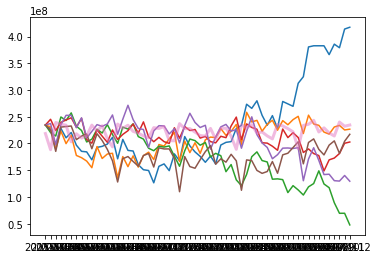

In [ ]:
np.random.seed(0)
for i in range(6):
    plt.plot(model_fit.simulate(len(data_ARIMA_cut_float), initial_state=model_fit.filtered_state[:, -1]))
plt.plot(data_ARIMA_cut_float, lw=3, alpha=0.5)
plt.show()

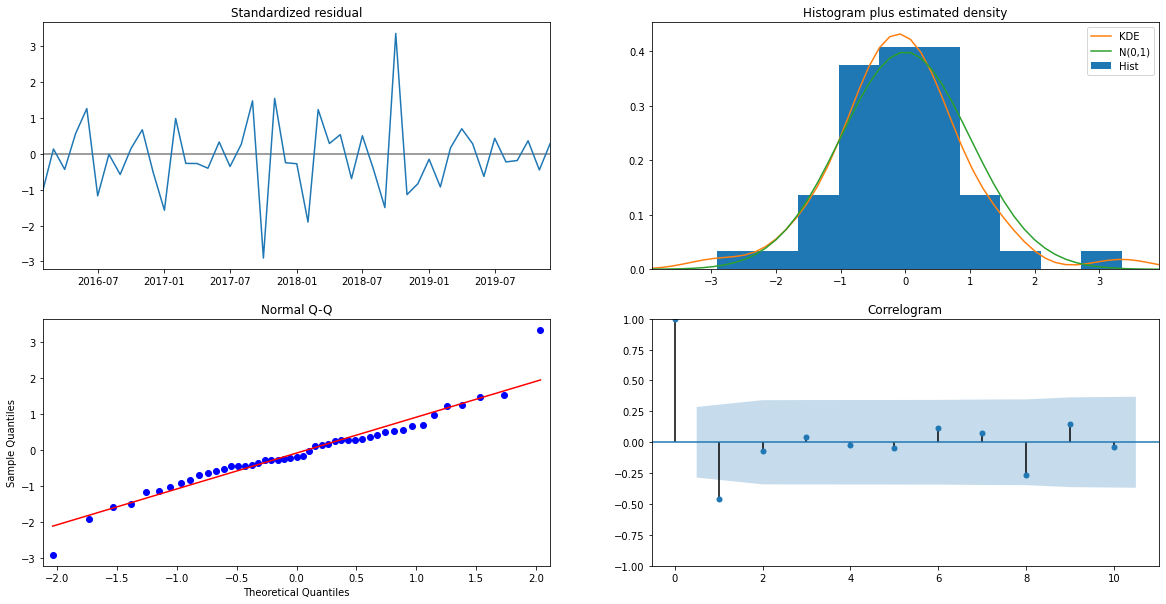

In [ ]:
model_fit.plot_diagnostics(figsize=(20,10))
plt.show()

In [ ]:
fore = model_fit.forecast(steps = 3)
print(fore)

2020-01-01    2.349484e+08
2020-02-01    2.085890e+08
2020-03-01    2.475826e+08
Freq: MS, dtype: float64


In [ ]:
data.loc['2020-03']

139686779

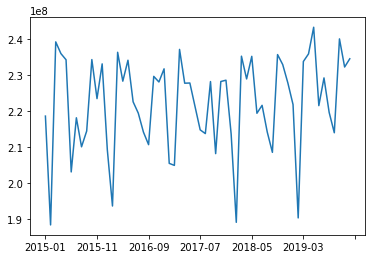

In [ ]:
data_2015to2019 = pd.Series(month_passengers_list, index = month_dates_list)
data_2015to2019_ARIMA_cut = data_2015to2019.loc[:'2019-12']
data_2015to2019_ARIMA_cut_float = data_2015to2019_ARIMA_cut[:].astype(np.float)
data_2015to2019_ARIMA_cut_float.plot()

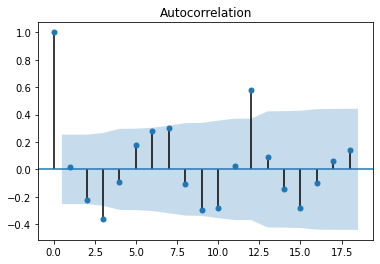

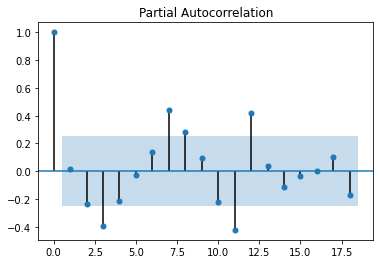

<Figure size 1440x288 with 0 Axes>

In [ ]:
plot_acf(data_2015to2019_ARIMA_cut_float)
plot_pacf(data_2015to2019_ARIMA_cut_float)
plt.figure(figsize=(20,4))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


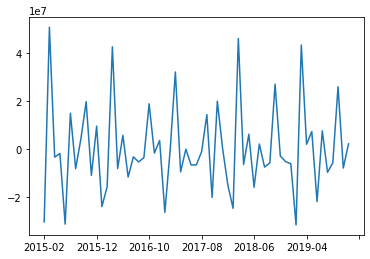

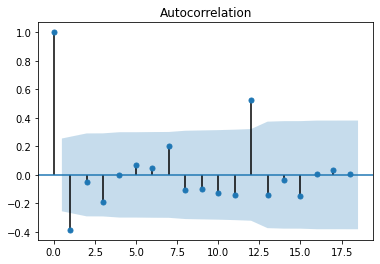

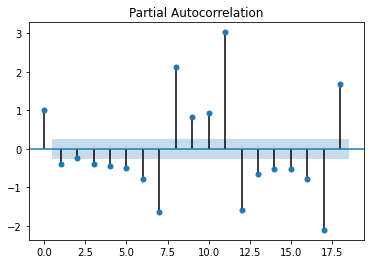

In [ ]:
diff_1 = data_2015to2019_ARIMA_cut_float.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
model = SARIMAX(data_2015to2019_ARIMA_cut_float, seasonal_order = (1,0,0,12))
model_fit = model.fit(trend = 'nc', full_output = True, disp=1)
print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -1080.529
Date:                            Tue, 12 May 2020   AIC                           2167.057
Time:                                    14:27:58   BIC                           2173.340
Sample:                                01-01-2015   HQIC                          2169.515
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9811      0.052     18.702      0.000       0.878       1.084
ar.S.L12       0.6539      0.145   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


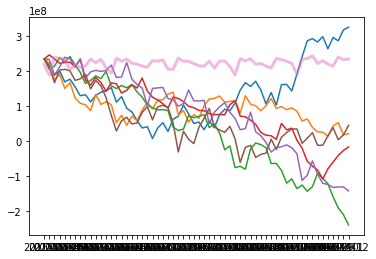

In [ ]:
np.random.seed(0)
for i in range(6):
    plt.plot(model_fit.simulate(len(data_2015to2019_ARIMA_cut_float), initial_state=model_fit.filtered_state[:, -1]))
plt.plot(data_2015to2019_ARIMA_cut_float, lw=3, alpha=0.5)
plt.show()

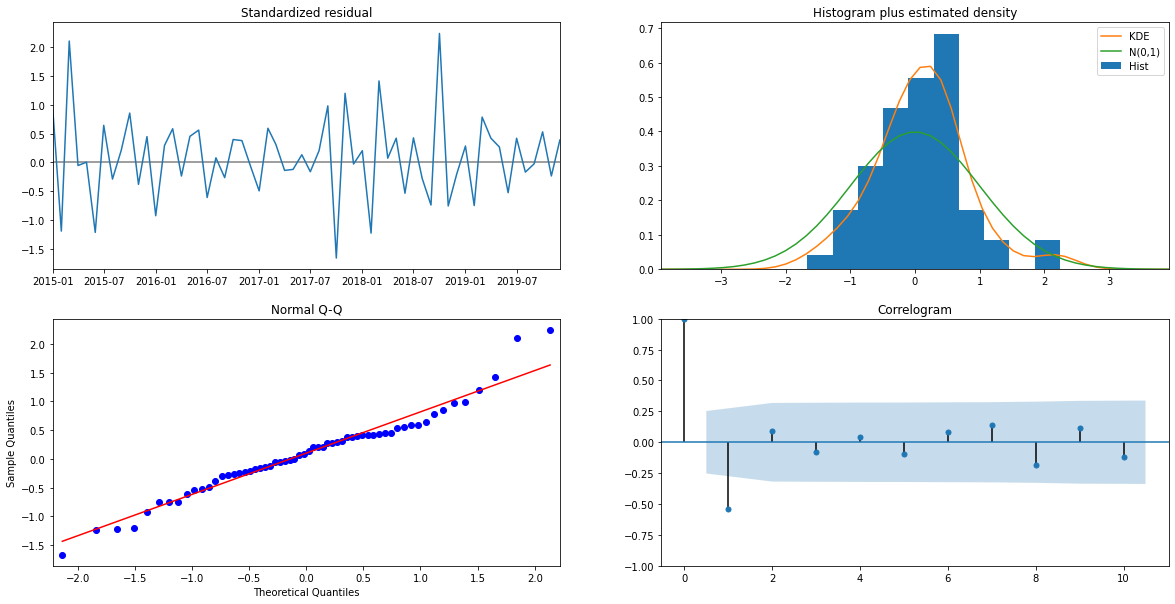

In [ ]:
model_fit.plot_diagnostics(figsize=(20,10))
plt.show()

In [ ]:
fore = model_fit.forecast(steps = 3)
print(fore)

2020-01-01    2.290419e+08
2020-02-01    2.068487e+08
2020-03-01    2.337190e+08
Freq: MS, dtype: float64


In [ ]:
data.loc['2020-01':'2020-03']

2020-01    207743593
2020-02    169582542
2020-03    139686779
dtype: int64

In [ ]:
139686779/2.337190e+08

0.5976697615512645

In [ ]:
y_true_covid = model_fit.forecast(steps = 3)
print(y_true_covid)
y_pred_covid = data_2015to2019.loc['2020-01':'2020-03']
print(y_pred_covid)

print()
for i in range(3):
  print(np.mean(np.abs((y_true_covid[i] - y_pred_covid[i]) / y_true_covid[i])) * 100)

2020-01-01    2.290419e+08
2020-02-01    2.068487e+08
2020-03-01    2.337190e+08
Freq: MS, dtype: float64
2020-01    207743593
2020-02    169582542
2020-03    139686779
dtype: int64

9.298865182347063
18.016137505942137
40.23301449559426


In [ ]:
data_past = pd.Series(month_passengers_list, index = month_dates_list)
data_past.reindex(index=data.index[::-1])

2020-03    139686779
2020-02    169582542
2020-01    207743593
2019-12    234574904
2019-11    232284482
             ...    
2015-05    234296965
2015-04    236022558
2015-03    239270675
2015-02    188391561
2015-01    218639396
Length: 63, dtype: int64

In [ ]:
data_past

2015-01    218639396
2015-02    188391561
2015-03    239270675
2015-04    236022558
2015-05    234296965
             ...    
2019-11    232284482
2019-12    234574904
2020-01    207743593
2020-02    169582542
2020-03    139686779
Length: 63, dtype: int64

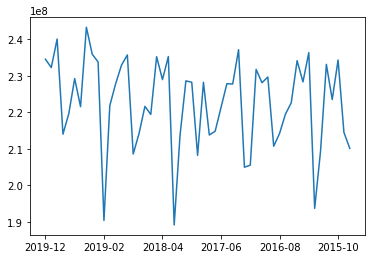

In [ ]:
data_past = pd.Series(month_passengers_list, index = month_dates_list)
data_past = data_past.reindex(index=data.index[::-1])
data_past_ARIMA_cut = data_past.loc['2019-12':'2015-08']
data_past_ARIMA_cut_float = data_past_ARIMA_cut[:].astype(np.float)
data_past_ARIMA_cut_float.plot()

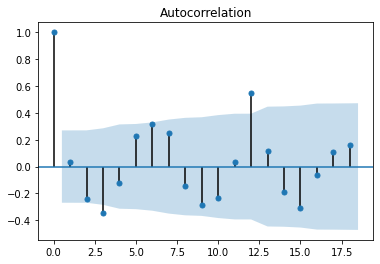

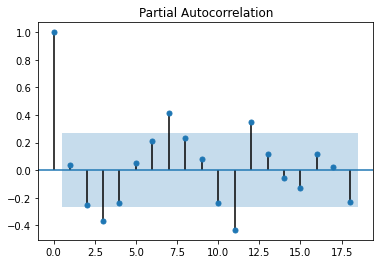

<Figure size 1440x288 with 0 Axes>

In [ ]:
plot_acf(data_past_ARIMA_cut_float)
plot_pacf(data_past_ARIMA_cut_float)
plt.figure(figsize=(20,4))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


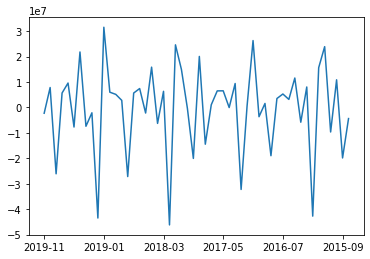

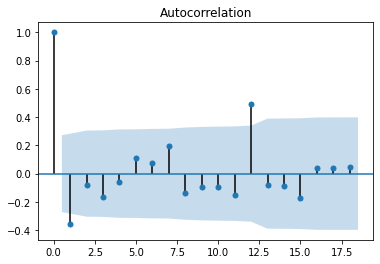

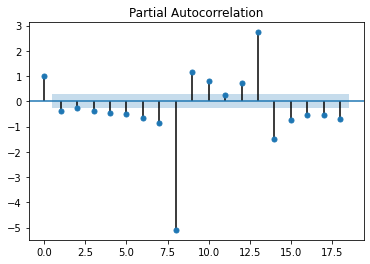

In [ ]:
diff_1 = data_past_ARIMA_cut_float.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
model = SARIMAX(data_past_ARIMA_cut_float, seasonal_order = (1,0,0,12))
model_fit = model.fit(trend = 'nc', full_output = True, disp=1)
print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   53
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -952.348
Date:                            Tue, 12 May 2020   AIC                           1910.696
Time:                                    14:28:01   BIC                           1916.607
Sample:                                12-01-2019   HQIC                          1912.969
                                     - 08-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9853      0.041     24.015      0.000       0.905       1.066
ar.S.L12       0.6048      0.149   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


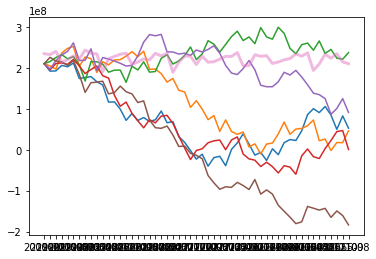

In [ ]:
np.random.seed(0)
for i in range(6):
    plt.plot(model_fit.simulate(len(data_past_ARIMA_cut_float), initial_state=model_fit.filtered_state[:, -1]))
plt.plot(data_past_ARIMA_cut_float, lw=3, alpha=0.5)
plt.show()

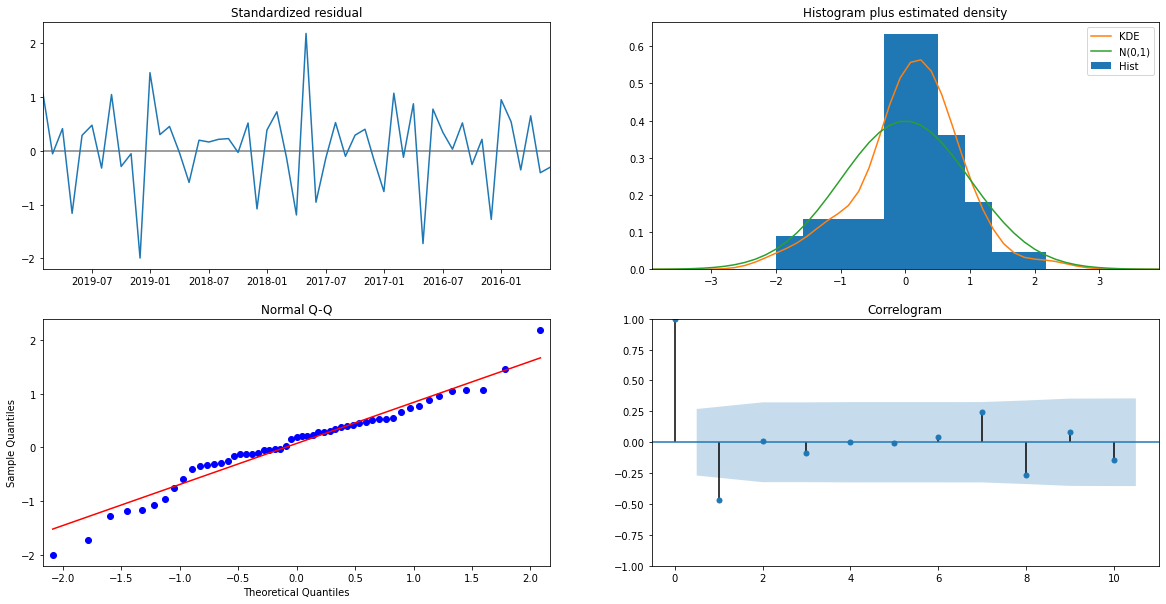

In [ ]:
model_fit.plot_diagnostics(figsize=(20,10))
plt.show()

In [ ]:
y_true = model_fit.forecast(steps = 3)
print(y_true)
print(y_true[0])

2015-07-01    2.121041e+08
2015-06-01    2.128369e+08
2015-05-01    2.186724e+08
Freq: -1MS, dtype: float64
212104134.63830113


In [ ]:
y_pred = data_past.loc['2015-07':'2015-05']
y_pred[0]

218172679

In [ ]:
218172679/2.121041e+08

1.0286113234020464

In [ ]:
203119706/2.128369e+08

0.9543444111429926

In [ ]:
234296965/2.186724e+08

1.0714519299189107

In [ ]:
y_true_mers = model_fit.forecast(steps = 3)
print(y_true_mers)
y_pred_mers = data_past.loc['2015-07':'2015-05']
print(y_pred_mers)

print(2015, 5,6,7)
for i in range(2,-1,-1):
  print(np.mean(np.abs((y_true_mers[i] - y_pred_mers[i]) / y_true_mers[i])) * 100)

2015-07-01    2.121041e+08
2015-06-01    2.128369e+08
2015-05-01    2.186724e+08
Freq: -1MS, dtype: float64
2015-07    218172679
2015-06    203119706
2015-05    234296965
dtype: int64
2015 5 6 7
7.14519331814256
4.565537348332722
2.8611155421592738


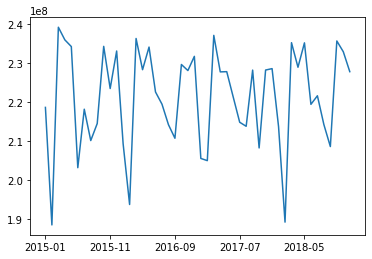

In [ ]:
data_2015to2019 = pd.Series(month_passengers_list, index = month_dates_list)
data_2015to2019_ARIMA_cut = data_2015to2019.loc[:'2018-12']
data_2015to2019_ARIMA_cut_float = data_2015to2019_ARIMA_cut[:].astype(np.float)
data_2015to2019_ARIMA_cut_float.plot()

In [ ]:
model = SARIMAX(data_2015to2019_ARIMA_cut_float, seasonal_order = (1,0,0,12))
model_fit = model.fit(trend = 'nc', full_output = True, disp=1)
print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -867.175
Date:                            Tue, 12 May 2020   AIC                           1740.350
Time:                                    14:28:03   BIC                           1745.963
Sample:                                01-01-2015   HQIC                          1742.471
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9846      0.046     21.486      0.000       0.895       1.074
ar.S.L12       0.5823      0.155   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [ ]:
fore = model_fit.forecast(steps = 12)
print(fore)

2019-01-01    2.176949e+08
2019-02-01    2.019352e+08
2019-03-01    2.274150e+08
2019-04-01    2.223406e+08
2019-05-01    2.246280e+08
2019-06-01    2.140633e+08
2019-07-01    2.140195e+08
2019-08-01    2.083930e+08
2019-09-01    2.038125e+08
2019-10-01    2.183697e+08
2019-11-01    2.155033e+08
2019-12-01    2.112891e+08
Freq: MS, dtype: float64


In [ ]:
data.loc['2019-01':'2019-12']

2019-01    221848014
2019-02    190335812
2019-03    233813277
2019-04    235928571
2019-05    243338053
2019-06    221547039
2019-07    229254848
2019-08    219672653
2019-09    214006728
2019-10    240101848
2019-11    232284482
2019-12    234574904
dtype: int64

In [ ]:
print(2.299288e+08/240101848 , 2.266528e+08/232284482, 2.218982e+08/234574904)

0.957630280296718 0.9757552379241589 0.9459588226027794


In [ ]:
y_true_2019 = model_fit.forecast(steps = 12)
print(y_true_2019)
y_pred_2019 = data_2015to2019.loc['2019-01':'2019-12']
print(y_pred_2019)

print(2019, 1,'~',12)
for i in range(12):
  print(np.mean(np.abs((y_true_2019[i] - y_pred_2019[i]) / y_true_2019[i])) * 100)

# print(np.mean(np.abs((y_true[0] - y_pred[0]) / y_true[0])) * 100)

2019-01-01    2.176949e+08
2019-02-01    2.019352e+08
2019-03-01    2.274150e+08
2019-04-01    2.223406e+08
2019-05-01    2.246280e+08
2019-06-01    2.140633e+08
2019-07-01    2.140195e+08
2019-08-01    2.083930e+08
2019-09-01    2.038125e+08
2019-10-01    2.183697e+08
2019-11-01    2.155033e+08
2019-12-01    2.112891e+08
Freq: MS, dtype: float64
2019-01    221848014
2019-02    190335812
2019-03    233813277
2019-04    235928571
2019-05    243338053
2019-06    221547039
2019-07    229254848
2019-08    219672653
2019-09    214006728
2019-10    240101848
2019-11    232284482
2019-12    234574904
dtype: int64
2019 1 ~ 12
1.9077645457294334
5.7441237967963
2.8134792362960512
6.111331713370871
8.329370863717068
3.496028982338976
7.118667748110448
5.4126721887039695
5.001750844673451
9.95199074218092
7.7869569466441
11.02084833966713


In [ ]:
y_pred_2019
y_true_2019
mape_2019 = []
for i in range(12):
  mape_2019.append(np.mean(np.abs((y_true_2019[i] - y_pred_2019[i]) / y_true_2019[i])))
x_2019 = ['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
          '2019-07','2019-08', '2019-09','2019-10', '2019-11', '2019-12']


y_pred_mers
y_true_mers
mape_mers = []
for i in range(2,-1,-1):
  mape_mers.append(np.mean(np.abs((y_true_mers[i] - y_pred_mers[i]) / y_true_mers[i])))
x_mers = ['2015-05', '2015-06', '2015-07']

y_pred_covid
y_true_covid
mape_covid = []
for i in range(3):
  mape_covid.append(np.mean(np.abs((y_true_covid[i] - y_pred_covid[i]) / y_true_covid[i])))
x_covid = ['2020-01', '2020-02', '2020-03']

Text(0, 0.5, 'MAPE')

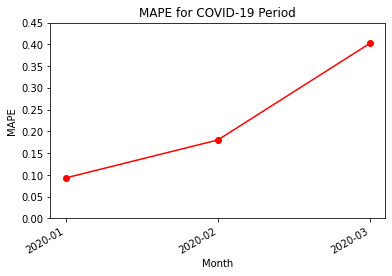

In [ ]:
plt.plot(x_covid, mape_covid, c = 'red', marker='o')
plt.ylim(0,0.45)
plt.gcf().autofmt_xdate()
plt.title("MAPE for COVID-19 Period")
plt.xlabel("Month")
plt.ylabel("MAPE")

Text(0, 0.5, 'MAPE')

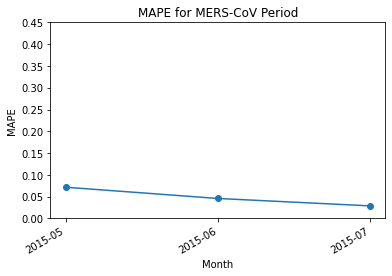

In [ ]:
plt.plot(x_mers, mape_mers, marker='o')
plt.ylim(0,0.45)
plt.gcf().autofmt_xdate()
plt.title("MAPE for MERS-CoV Period")
plt.xlabel("Month")
plt.ylabel("MAPE")

Text(0, 0.5, 'MAPE')

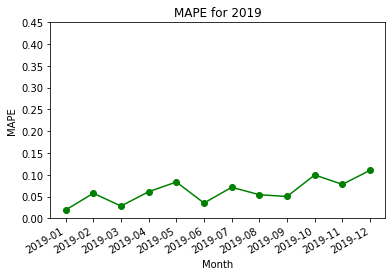

In [ ]:
plt.plot(x_2019, mape_2019, c = 'green', marker='o')
plt.ylim(0,0.45)
plt.gcf().autofmt_xdate()
plt.title("MAPE for 2019")
plt.xlabel("Month")
plt.ylabel("MAPE")